In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

#### CIFAR-10 데이터셋 로드

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 129s 1us/step


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### 컨볼루션 신경망 사용 예제

In [32]:
cnn_model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(input_shape=(32, 3)),
    Dense(80, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [33]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = cnn_model.fit(X_train, y_train, epochs=20, validation_split=0.3, verbose=1)

Epoch 1/20
1094/1094 [==============================] - 46s 42ms/step - loss: 1.5284 - accuracy: 0.4480 - val_loss: 1.3841 - val_accuracy: 0.5083
Epoch 2/20
1094/1094 [==============================] - 37s 33ms/step - loss: 1.2057 - accuracy: 0.5726 - val_loss: 1.1701 - val_accuracy: 0.5921
Epoch 3/20
1094/1094 [==============================] - 34s 31ms/step - loss: 1.0697 - accuracy: 0.6211 - val_loss: 1.1058 - val_accuracy: 0.6109
Epoch 4/20
1094/1094 [==============================] - 42s 39ms/step - loss: 0.9637 - accuracy: 0.6635 - val_loss: 1.0459 - val_accuracy: 0.6369
Epoch 5/20
1094/1094 [==============================] - 38s 35ms/step - loss: 0.8661 - accuracy: 0.6993 - val_loss: 0.9898 - val_accuracy: 0.6607
Epoch 6/20
1094/1094 [==============================] - 35s 32ms/step - loss: 0.7881 - accuracy: 0.7245 - val_loss: 0.9921 - val_accuracy: 0.6611
Epoch 7/20
1094/1094 [==============================] - 35s 32ms/step - loss: 0.7080 - accuracy: 0.7517 - val_loss: 1.0246 -

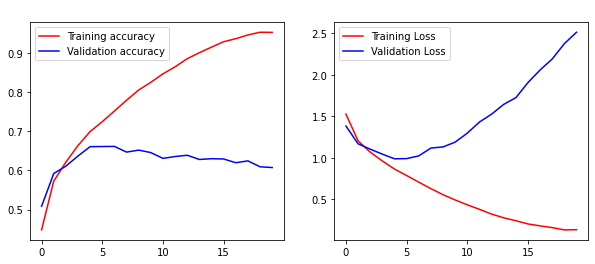

In [35]:
# 학습 과정 시각화 
def plot_history():    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label = 'Validation accuracy')
    plt.title('accuracy plot', color='white')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'r', label = 'Training Loss')
    plt.plot(history.history['val_loss'], 'b', label = 'Validation Loss')
    plt.title('loss plot', color='white')
    plt.legend()

plot_history()


### 기본 심층신경망 사용 예제 

In [43]:
dnn_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [44]:
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(X_train, y_train, epochs=20, validation_split=0.3, verbose=1)

Epoch 1/20
1094/1094 [==============================] - 23s 21ms/step - loss: 2.0214 - accuracy: 0.2370 - val_loss: 1.8962 - val_accuracy: 0.3092
Epoch 2/20
1094/1094 [==============================] - 24s 22ms/step - loss: 1.8319 - accuracy: 0.3269 - val_loss: 1.7913 - val_accuracy: 0.3463
Epoch 3/20
1094/1094 [==============================] - 25s 23ms/step - loss: 1.7402 - accuracy: 0.3698 - val_loss: 1.7328 - val_accuracy: 0.3717
Epoch 4/20
1094/1094 [==============================] - 24s 22ms/step - loss: 1.6656 - accuracy: 0.3976 - val_loss: 1.6822 - val_accuracy: 0.3959
Epoch 5/20
1094/1094 [==============================] - 22s 20ms/step - loss: 1.6085 - accuracy: 0.4217 - val_loss: 1.6615 - val_accuracy: 0.4068
Epoch 6/20
1094/1094 [==============================] - 22s 20ms/step - loss: 1.5754 - accuracy: 0.4317 - val_loss: 1.6013 - val_accuracy: 0.4300
Epoch 7/20
1094/1094 [==============================] - 22s 20ms/step - loss: 1.5404 - accuracy: 0.4469 - val_loss: 1.5747 -

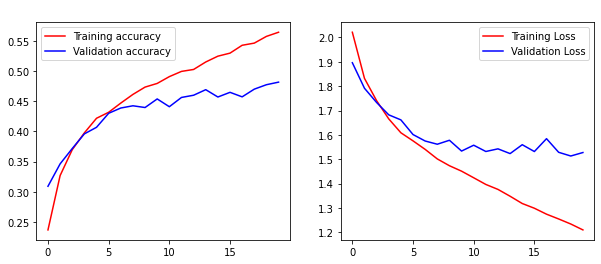

In [45]:
plot_history()